<a href="https://colab.research.google.com/github/jcdevaney/gawayneLessons/blob/main/week2/YINandSpectralFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some notes on the functions

### Function 1
yinvalues = getYinVals(filename)

### Function 2
subplotFunc(yinvalues,subplotNum,additionalargs)

Calls:
plt.subplot(1,1,subplotNume) and plt.plot(np.asarray(yinvalues))

### How you'll call the functions

yinvalues1 = getYinVals(filename1)
yinvalues2 = getYinVals(filename2)
yinvalues3 = getYinVals(filename3)
yinvalues4 = getYinVals(filename4)
yinvalues5 = getYinVals(filename5)
yinvalues6 = getYinVals(filename6)

plt.figure(figsize=(12, 8))

subplotFunc(yinvalues1,1,additionalargs)
subplotFunc(yinvalues2,2,additionalargs)
subplotFunc(yinvalues3,3,additionalargs)
subplotFunc(yinvalues4,4,additionalargs)
subplotFunc(yinvalues5,5,additionalargs)
subplotFunc(yinvalues6,6,additionalargs)

# pYIN algorithm, implemented in librosa: https://librosa.org/

In [1]:
# USE THIS CODE

import matplotlib.pyplot as plt
import numpy as np
import librosa


In [2]:
# USE THIS CODE

#https://librosa.org/doc/latest/generated/librosa.pyin.html

# loading the audio file
y, sr = librosa.load('files/avm.wav')

# runing the f0 estimation
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))

# is to create a vector of time points that corresponds to the audio (useful for plotting)
times = librosa.times_like(f0)

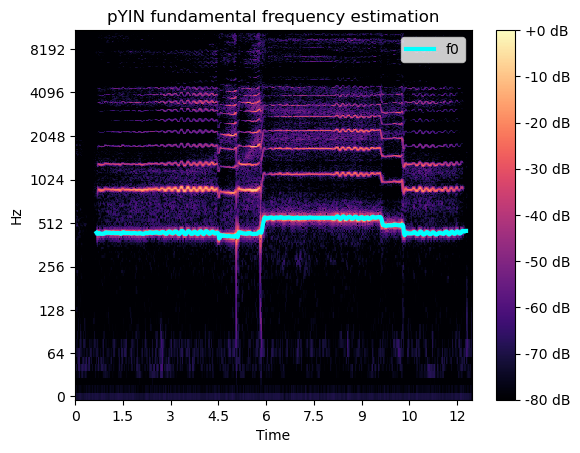

In [3]:
# USE THIS CODE

# Overlay F0 over a spectrogram

# run the short time fourier transform
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# setting up subplots
fig, ax = plt.subplots()

# generating the spectrogram
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

# plotting
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')